# 2.4 Naive Linear Regression

In order to trim the list of considered stocks from 100 to 10, I will perform a simple linear regression in time and price and overlay it with the chart of the price. I will record the r2 of each line as a column in the dataset, then sort them by r2 descending and plot the charts. 

My goal is to find the straightest charts out of the set, quantitatively, and forward them as recommendations for watch. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

key_df = pd.read_csv('./data/screens/1yeartopperformers/top100alpha.csv')
key_df.head()

SYMBOL      mean       std     alpha
0   DOCU  0.669910  3.329333  0.201214
1    APG  0.542511  2.696561  0.201186
2   PRTS  1.168491  6.005884  0.194558
3   TSLA  0.973406  5.113792  0.190349
4   DKNG  0.951621  5.210704  0.182628

In [2]:
data_dir = './data/screens/1yeartopperformers/'
tail = '190820.pickle'

def load_set(stock, data_dir=data_dir, tail=tail):
    df = pd.read_pickle('{}{}{}'.format(data_dir, stock, tail))
    return df

In [4]:
load_set(key_df['SYMBOL'].iloc[0])
# close
# index

open    high       low   close   volume        date SYMBOL  \
252  213.490  213.53  207.6881  209.47  2763874  2020-08-18   DOCU   
251  202.240  209.83  201.9800  207.70  2590486  2020-08-17   DOCU   
250  201.355  204.46  197.2100  199.71  1952648  2020-08-14   DOCU   
249  194.220  203.85  193.6200  199.38  4048023  2020-08-13   DOCU   
248  192.650  196.88  189.1200  193.30  4591084  2020-08-12   DOCU   
..       ...     ...       ...     ...      ...         ...    ...   
4     44.660   45.24   43.7700   43.98  1247518  2019-08-23   DOCU   
3     45.340   45.34   44.2200   44.75  1254571  2019-08-22   DOCU   
2     45.000   45.88   44.6600   45.02  1259584  2019-08-21   DOCU   
1     44.360   44.95   43.7350   44.63  1911594  2019-08-20   DOCU   
0     45.610   45.99   44.3250   44.54  2134175  2019-08-19   DOCU   

     prev_close  diff_1  pct_change  log_return  
252      207.70    1.77    0.008522    0.008486  
251      199.71    7.99    0.040008    0.039228  
250      199.38    0.33    0.001655    0.001654  
249      193.30    6.08    0.031454    0.030969  
248      191.82    1.48    0.007716    0.007686  
..          ...     ...         ...         ...  
4         44.75   -0.77   -0.017207   -0.017356  
3         45.02   -0.27   -0.005997   -0.006015  
2         44.63    0.39    0.008739    0.008701  
1         44.54    0.09    0.002021    0.002019  
0           NaN     NaN         NaN         NaN  

[253 rows x 11 columns]

In [17]:
df = load_set(key_df['SYMBOL'].iloc[0])
y = df['close']
x = df.index.values.reshape(-1,1)

In [18]:
y.shape, x.shape

((253,), (253, 1))

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x, y)
lr.score(x, y)

0.7979245859368287

In [20]:
top_100 = key_df['SYMBOL'].head(100)

In [21]:
scores = {}

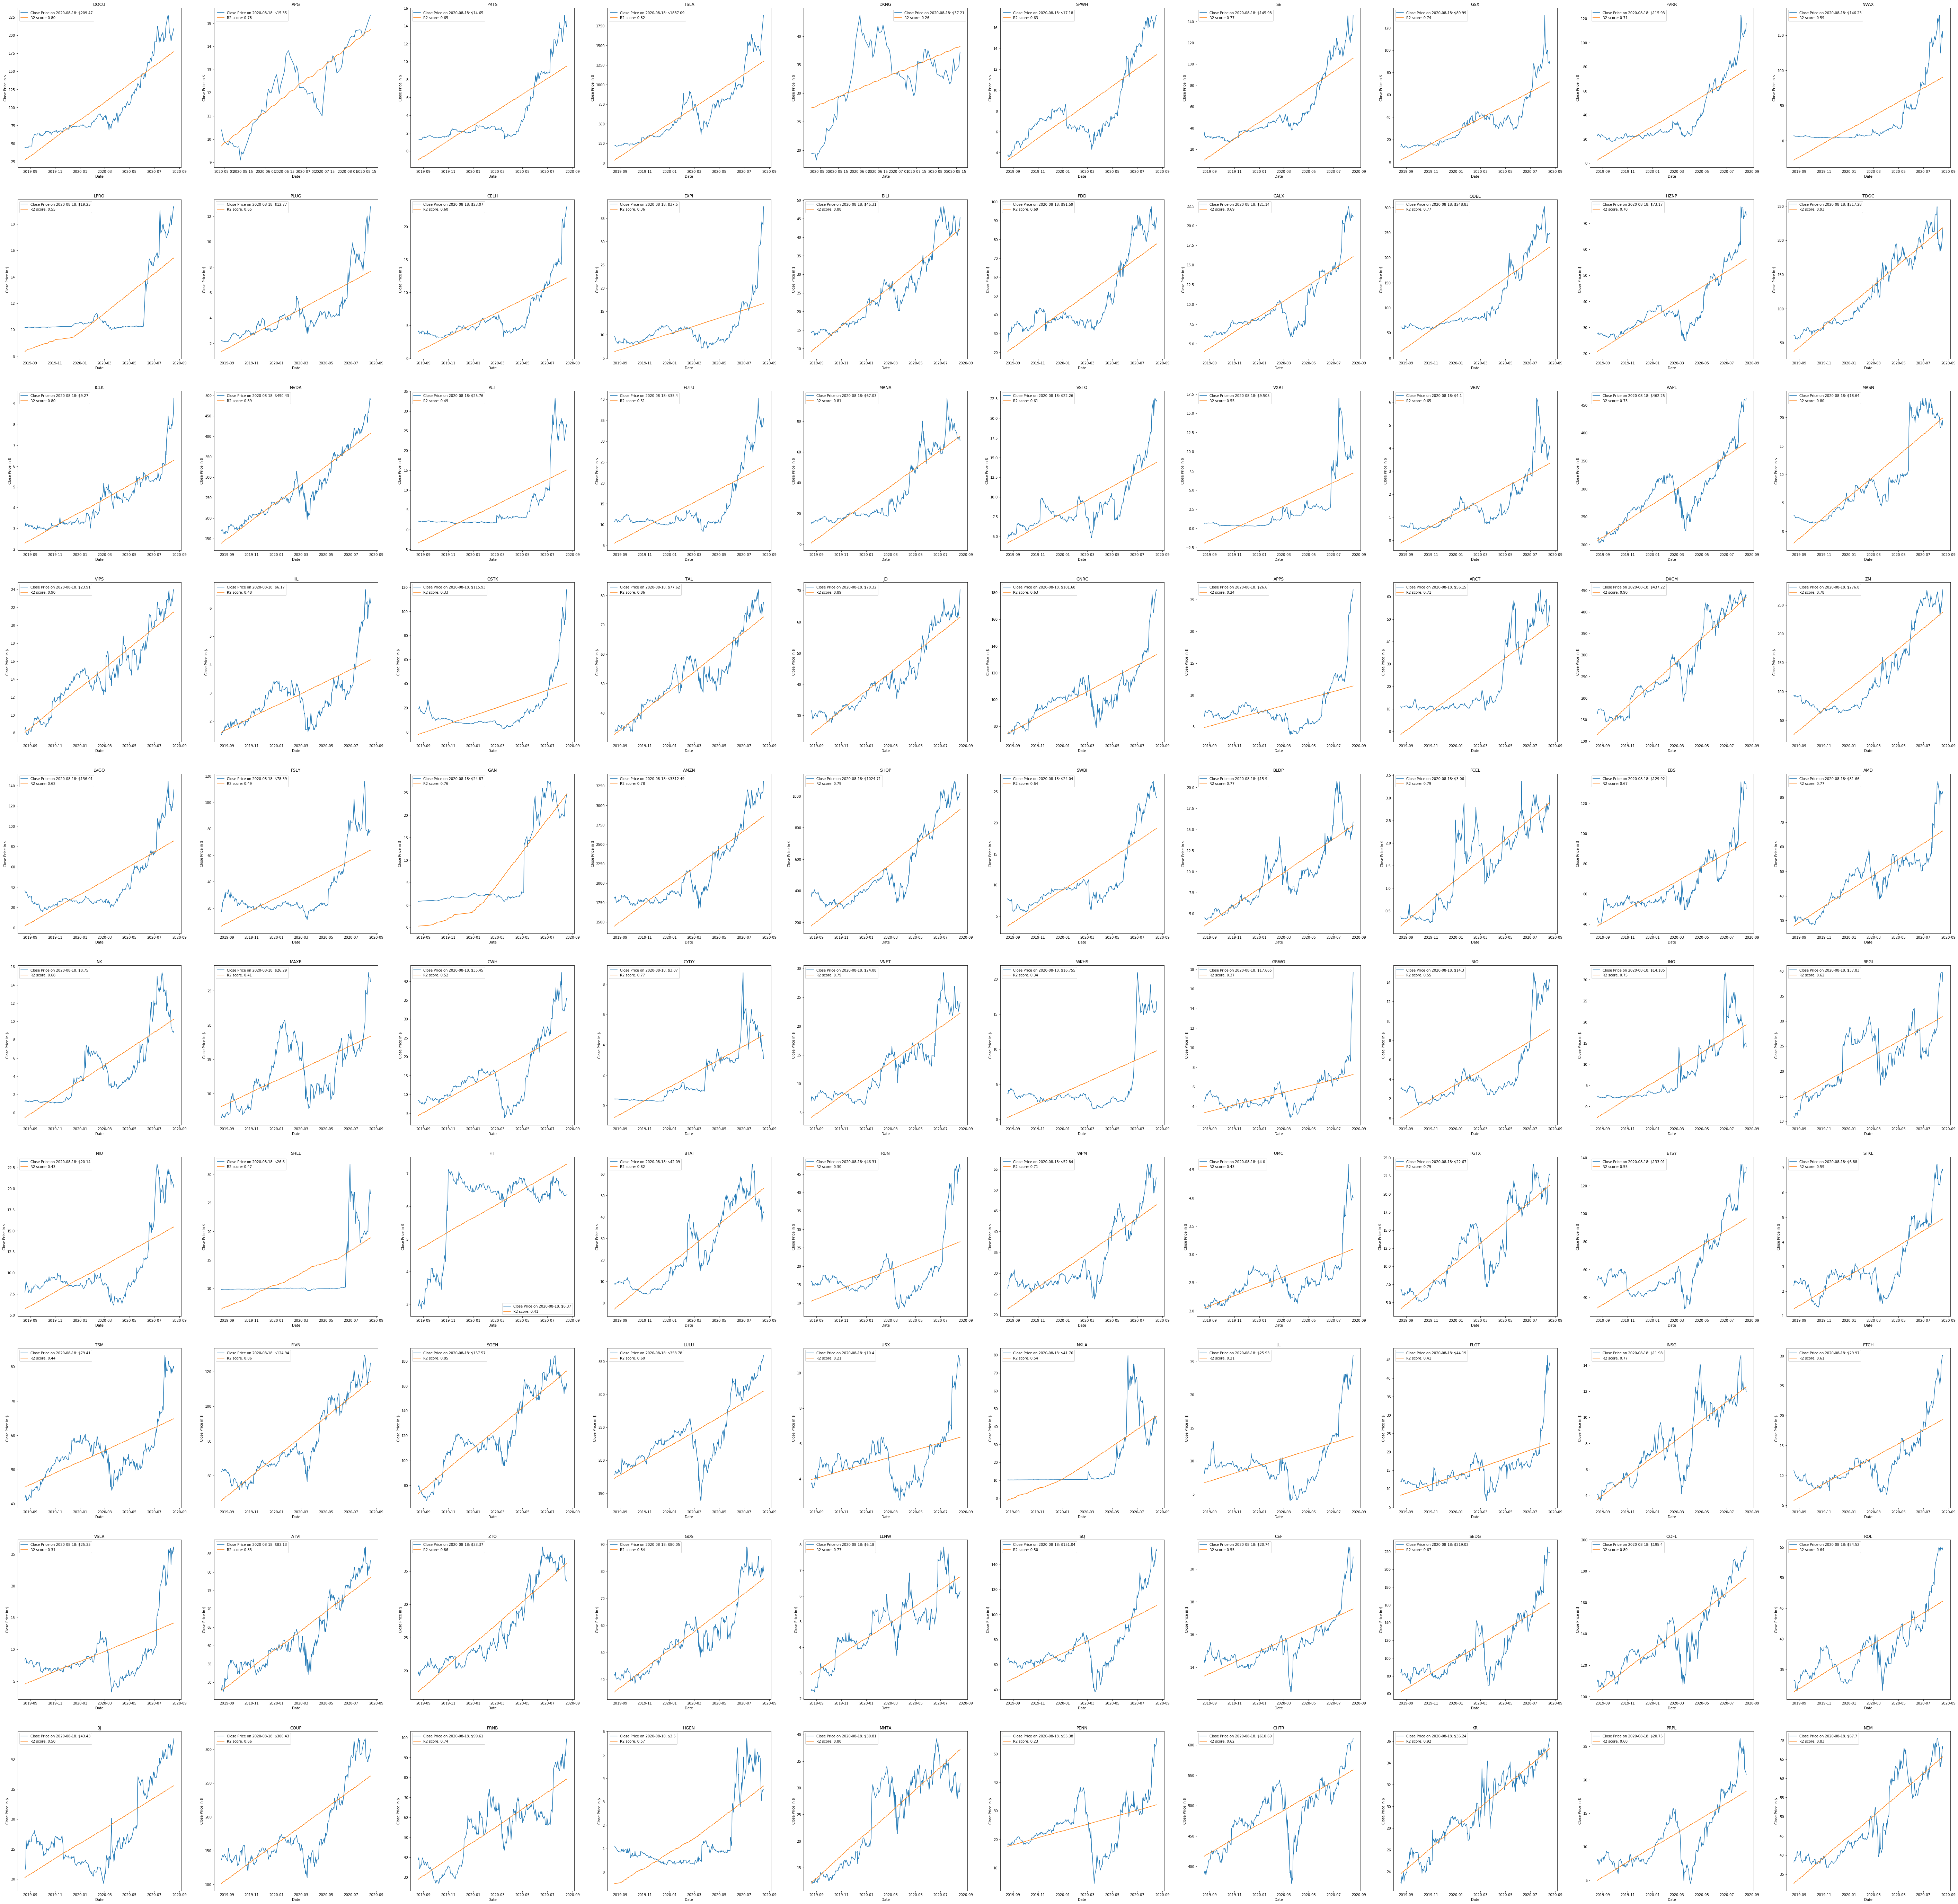

In [24]:
fig, axs = plt.subplots(10, 10, figsize=(100,100))

for i, sym in enumerate(top_100):
    c = divmod(i, 10)
    df = load_set(data_dir=data_dir, stock=sym, tail=tail)
    y = df['close']
    x = df.index.values.reshape(-1,1)
    
    lr = LinearRegression()
    
    lr.fit(x, y)
    scores[sym] = lr.score(x, y)
    y_pred = lr.predict(x)
    
    axs[c[0], c[1]].plot(df['date'], df['close'], label='Close Price on {}: ${}'.format(df.iloc[0]['date'], df.iloc[0]['close']))
    axs[c[0], c[1]].plot(df['date'], y_pred, label='R2 score: {:.2f}'.format(scores[sym]))
    axs[c[0], c[1]].set_title(sym)
    axs[c[0], c[1]].set_ylabel('Close Price in $')
    axs[c[0], c[1]].set_xlabel('Date')
    axs[c[0], c[1]].legend()

plt.savefig('./data/images/1yeartop100.png', transparent=False)

In [28]:
for sym in key_df['SYMBOL']:
    df = load_set(data_dir=data_dir, stock=sym, tail=tail)
    y = df['close']
    x = df.index.values.reshape(-1,1)
    
    lr = LinearRegression()
    
    lr.fit(x, y)
    scores[sym] = {'R2_score': lr.score(x, y)}
    y_pred = lr.predict(x)

scores

{'DOCU': {'R2_score': 0.7979245859368287},
 'APG': {'R2_score': 0.7785108440268569},
 'PRTS': {'R2_score': 0.6537381345049563},
 'TSLA': {'R2_score': 0.817614175192345},
 'DKNG': {'R2_score': 0.2608505667197064},
 'SPWH': {'R2_score': 0.6332266631850407},
 'SE': {'R2_score': 0.7676147386238681},
 'GSX': {'R2_score': 0.7356613167245849},
 'FVRR': {'R2_score': 0.7111631857889811},
 'NVAX': {'R2_score': 0.5916896458973752},
 'LPRO': {'R2_score': 0.5516954899841444},
 'PLUG': {'R2_score': 0.6514875434340843},
 'CELH': {'R2_score': 0.5980519878733845},
 'EXPI': {'R2_score': 0.35832887082773834},
 'BILI': {'R2_score': 0.8817971583331972},
 'PDD': {'R2_score': 0.6920112653952536},
 'CALX': {'R2_score': 0.6891307844228562},
 'QDEL': {'R2_score': 0.774283131442876},
 'HZNP': {'R2_score': 0.6963601281480896},
 'TDOC': {'R2_score': 0.9274874972820015},
 'ICLK': {'R2_score': 0.7965362502170641},
 'NVDA': {'R2_score': 0.8859891825116332},
 'ALT': {'R2_score': 0.49050453484145995},
 'FUTU': {'R2_sco

In [32]:
r2_df = pd.DataFrame(scores).T.reset_index()
r2_df.rename({'index':'SYMBOL'}, axis=1, inplace=True)
r2_df

SYMBOL  R2_score
0     DOCU  0.797925
1      APG  0.778511
2     PRTS  0.653738
3     TSLA  0.817614
4     DKNG  0.260851
..     ...       ...
318    APO  0.200614
319    MAG  0.240431
320   IOVA  0.560711
321    NGD  0.114818
322   NGHC  0.054997

[323 rows x 2 columns]

In [34]:
key_df = key_df.merge(r2_df, how='left', on='SYMBOL')

In [39]:
top_10 = key_df.sort_values(by='R2_score', ascending=False).head(10)['SYMBOL']

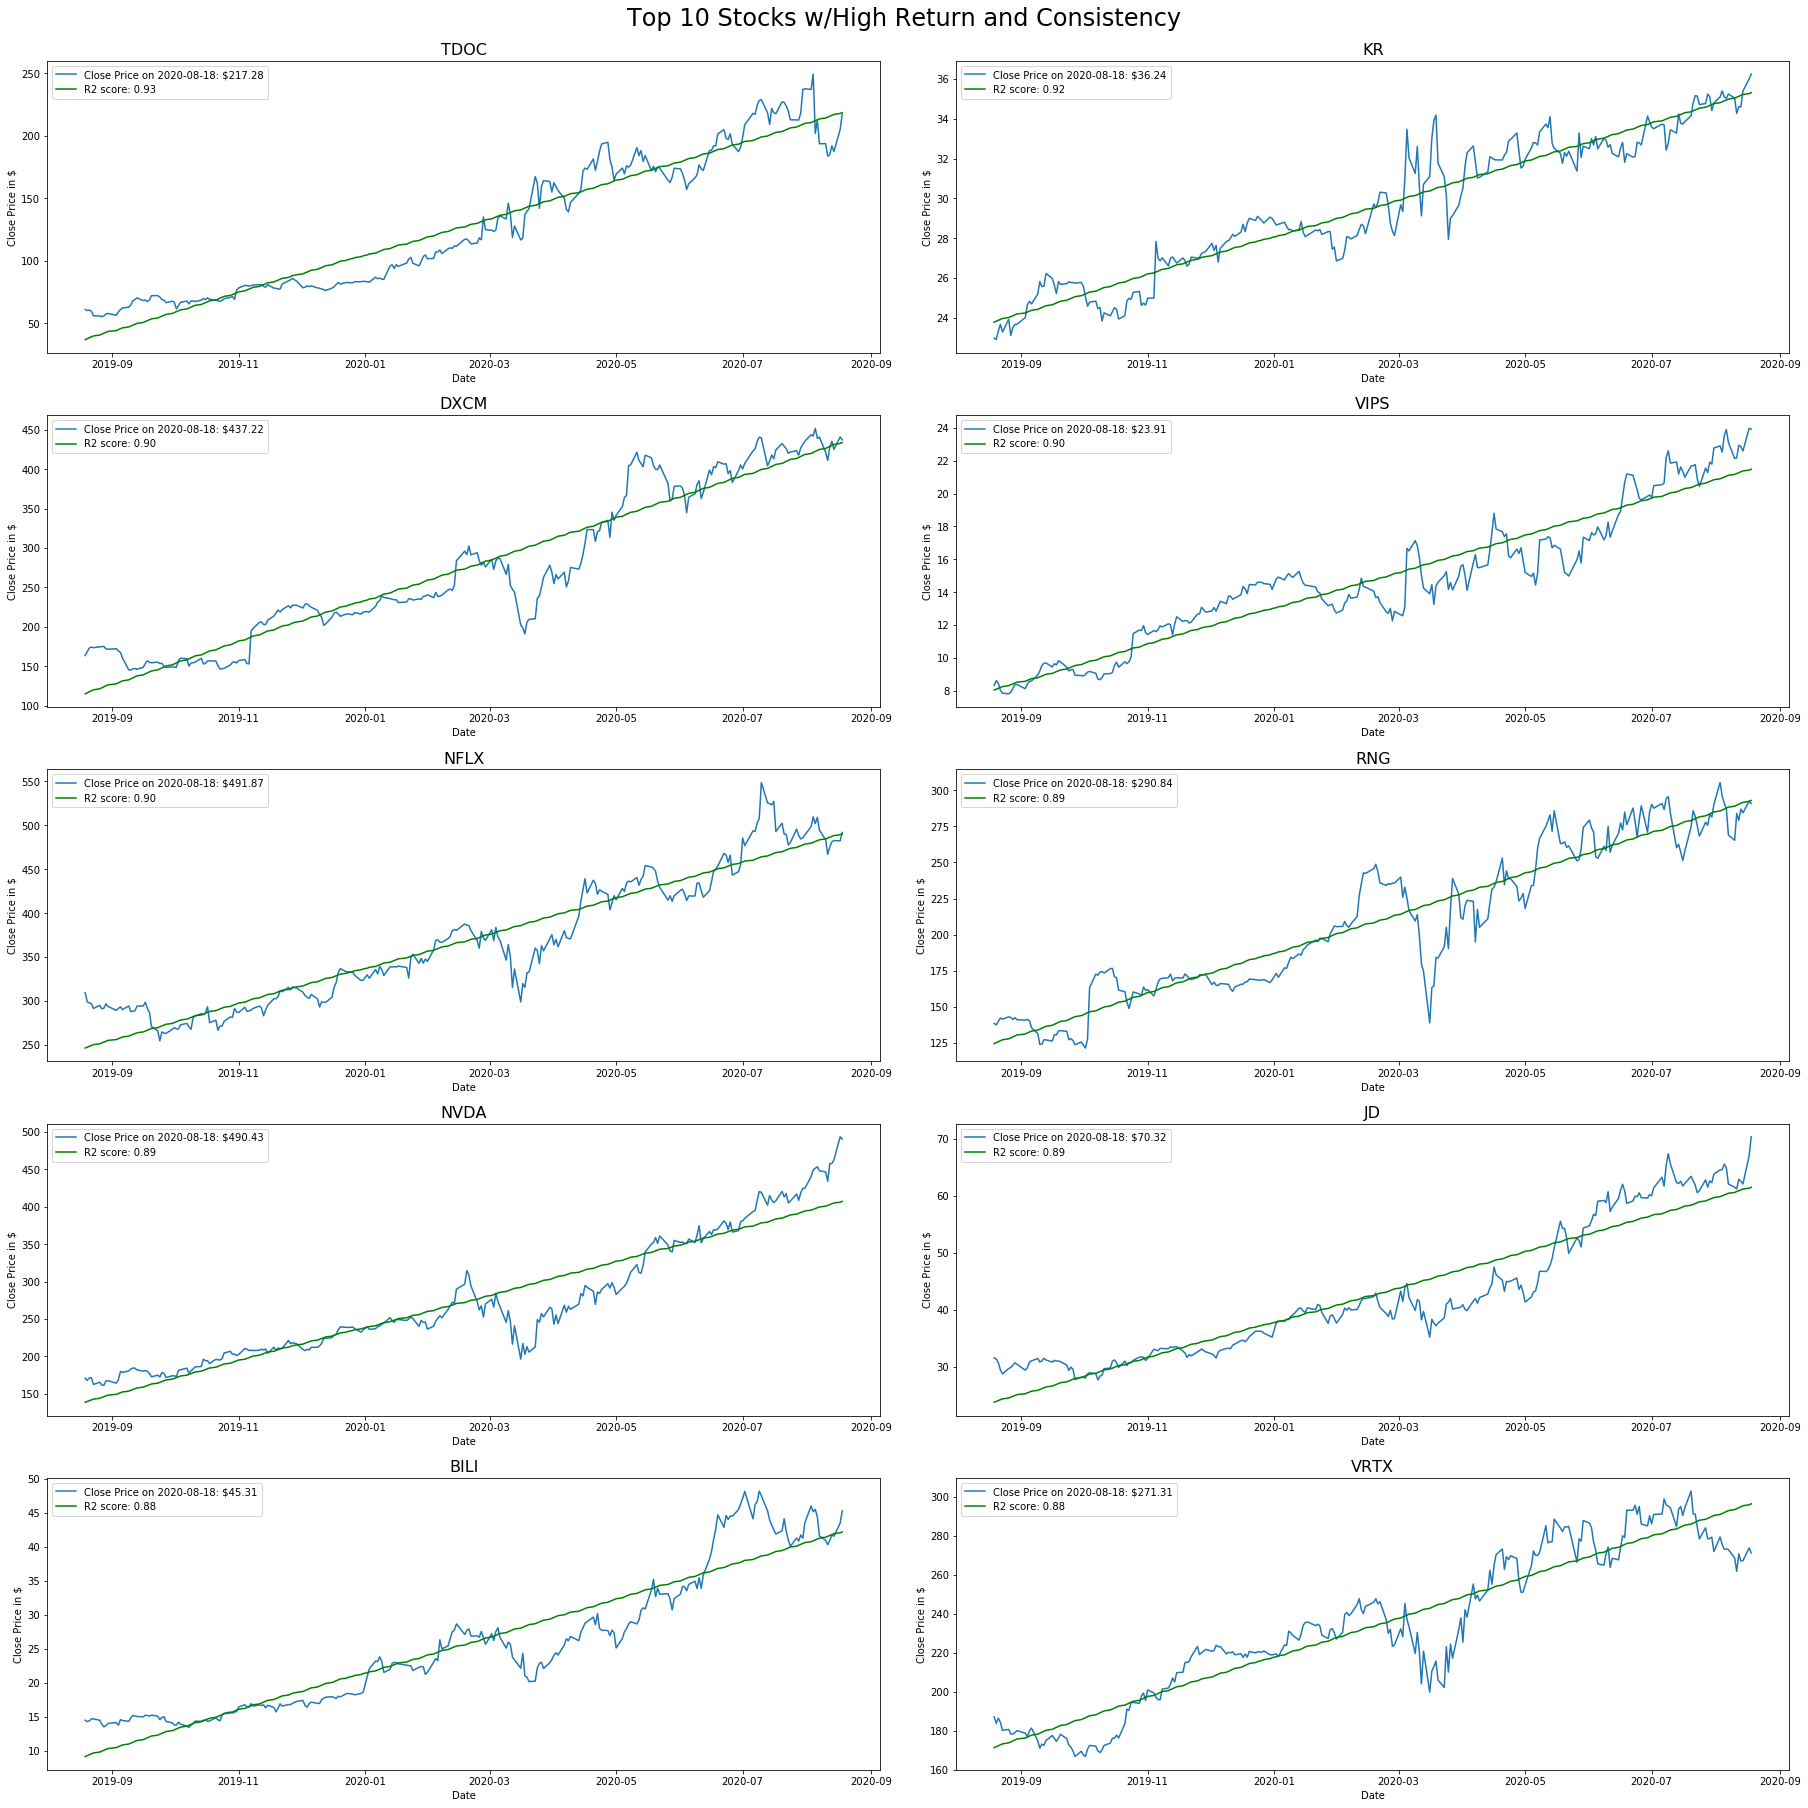

In [58]:
fig, axs = plt.subplots(5, 2, figsize=(25,25), constrained_layout=True)
fig.suptitle('Top 10 Stocks w/High Return and Consistency', fontsize = 24)
for i, sym in enumerate(top_10):
    c = divmod(i, 2)
    df = load_set(data_dir=data_dir, stock=sym, tail=tail)
    y = df['close']
    x = df.index.values.reshape(-1,1)
    
    lr = LinearRegression()
    
    lr.fit(x, y)
    scores[sym] = lr.score(x, y)
    y_pred = lr.predict(x)
    
    axs[c[0], c[1]].plot(df['date'], df['close'], label='Close Price on {}: ${}'.format(df.iloc[0]['date'], df.iloc[0]['close']))
    axs[c[0], c[1]].plot(df['date'], y_pred, label='R2 score: {:.2f}'.format(scores[sym]), c='g')
    axs[c[0], c[1]].set_title(sym, fontsize= 16)
    axs[c[0], c[1]].set_ylabel('Close Price in $')
    axs[c[0], c[1]].set_xlabel('Date')
    axs[c[0], c[1]].legend()
#plt.text(0.5, 0.01, 'Stocks were screened for those with the highest % return over the last year, market capitalization over $500 million, and volume of 600,000. A linear regression was then performed on the the top 100 such stocks. Above are shown the 10 with the highest R2 score.')
plt.savefig('./data/images/1yeartop10.png', transparent=False)

In [48]:
for stock in top_10:
    print(stock)

TDOC
KR
DXCM
VIPS
NFLX
RNG
NVDA
JD
BILI
VRTX


In [59]:
key_df.sort_values(by='R2_score', ascending=False).head(10)

SYMBOL      mean       std     alpha  R2_score
19    TDOC  0.594309  4.254236  0.139698  0.927487
97      KR  0.202419  2.094041  0.096664  0.922907
38    DXCM  0.457112  3.692846  0.123783  0.903131
30    VIPS  0.485535  3.725398  0.130331  0.898214
153   NFLX  0.219156  2.647691  0.082772  0.897833
118    RNG  0.381475  4.217503  0.090451  0.889937
21    NVDA  0.479109  3.450952  0.138834  0.885989
34      JD  0.357183  2.806015  0.127292  0.885754
14    BILI  0.513056  3.472033  0.147768  0.881797
235   VRTX  0.178945  2.515399  0.071140  0.878088